In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

%matplotlib inline

In [2]:
df_id = pd.read_csv('olist_customers_dataset.csv')
df_id.shape
# таблица с уникальными идентификаторами пользователей

# customer_id — позаказный идентификатор пользователя

# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

# customer_zip_code_prefix —  почтовый индекс пользователя

# customer_city —  город доставки пользователя

# customer_state —  штат доставки пользователя

(99441, 5)

In [3]:
df_order = pd.read_csv('olist_orders_dataset.csv')
df_order.shape
#  таблица заказов
#     order_id —  уникальный идентификатор заказа (номер чека)

#     customer_id —  позаказный идентификатор пользователя

#     order_status —  статус заказа

#     order_purchase_timestamp —  время создания заказа

#     order_approved_at —  время подтверждения оплаты заказа

#     order_delivered_carrier_date —  время передачи заказа в логистическую службу

#     order_delivered_customer_date —  время доставки заказа

#     order_estimated_delivery_date —  обещанная дата доставки
# Уникальные статусы заказов в таблице olist_orders_dataset:

# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт

# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён

(99441, 8)

In [4]:
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_items.shape
# товарные позиции, входящие в заказы
# order_id —  уникальный идентификатор заказа (номер чека)

# order_item_id —  идентификатор товара внутри одного заказа

# product_id —  ид товара (аналог штрихкода)

# seller_id — ид производителя товара

# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

# price —  цена за единицу товара

# freight_value —  вес товара

(112650, 7)

In [5]:
# Cоберем датафрейм для анализа
df_order_plus_df_items = df_items.merge(df_order, on = 'order_id')
df = df_order_plus_df_items.merge(df_id, on = 'customer_id')
df.shape

(112650, 18)

In [6]:
df = df.dropna()

In [7]:
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [8]:
# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
# Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.
# В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя 
# до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок
# за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй 
# границы метрик recency, frequency и monetary для интерпретации этих кластеров. 
# Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) 
# имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю,
# monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (23 балла)

In [9]:
#  не применяю фильр по order_item_id, далее в расчетах мы это учтём.
df = df.query("order_purchase_timestamp !=''")
df.order_purchase_timestamp.agg(['min', 'max'])

min    2016-09-15 12:16:38
max    2018-08-29 15:00:37
Name: order_purchase_timestamp, dtype: object

In [10]:
# Посчитаем количество заказов для каждого пользователя, более подробно об этом есть в файле
# Project1_4

In [11]:
frequency = df.query("order_item_id== '1'")\
              .query('order_delivered_customer_date != ""')\
              .groupby(['customer_unique_id'],as_index = False )\
              .agg({'product_id' :'count'})\
              .sort_values('product_id', ascending = False)\
              .rename(columns={'product_id':'frequency'})

In [12]:
# распределение заказов по пользователям

In [13]:
frequency.describe(percentiles = [.10, .20, .40, .50, .60, .70, .80, .90, .99])

,frequency
count,93342.000000
mean,1.033415
std,0.209091
min,1.000000
10%,1.000000
20%,1.000000
40%,1.000000
50%,1.000000
60%,1.000000
70%,1.000000


In [14]:
# 90% клиентов делали заказ 1 раза и менее, 99% 2 раза и менее

In [35]:
#посчитаем сумму принесенную каждым клиентом - monetary
monetary = df\
    .groupby(['customer_unique_id'], as_index=False)\
    .agg({'price': 'sum'})\
    .rename(columns={'price': 'monetary'})


In [36]:
monetary.customer_unique_id.nunique()

93342

In [37]:
# Дата последней покупки для пользователя (постоянно проверяю размер датафрейма,
# т к знаю что количество уникальных пользователей 93342 и проверяю сам себя)
df_last_order = df\
    .sort_values('order_approved_at')\
    .groupby('customer_unique_id', as_index=False).last()\
    .rename(columns={'order_approved_at': 'last_order'})
df_last_order.shape


(93342, 18)

In [38]:
df_full = df_last_order.merge(monetary, on='customer_unique_id')
df_full.shape

(93342, 19)

In [45]:
monetary.monetary.describe(percentiles = [.10, .20, .40, .50, .60, .70, .80, .90, .99])

count    93342.000000
mean       141.619482
std        215.708238
min          0.850000
10%         25.980000
20%         39.900000
40%         69.900000
50%         89.700000
60%        109.900000
70%        139.000000
80%        179.900000
90%        279.990000
99%       1004.990000
max      13440.000000
Name: monetary, dtype: float64

In [46]:
# Наконец, я собираюсь смоделировать анализ, который я делаю в режиме реального времени,
# установив дату NOWна один день после последней покупки. Эта дата будет использоваться 
# в качестве ориентира для подсчета Recency баллов.

# -------для себя пометка--------
# p.s. при анализе в задании 4, я применял за сейчас день последней покупки, возможно стоило
# поступить также.

In [47]:
df.order_purchase_timestamp = pd.to_datetime(df.order_purchase_timestamp)

In [48]:
NOW = df['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-08-30 15:00:37')

In [49]:
# Я собираюсь изучить данные в течение одного года. Я установил periodпеременную на 365 (дней).
# Вы можете изменить это значение в зависимости от ваших потребностей. Это будет зависеть 
# от отрасли и ожидаемого поведения клиентов, но один год является обычно используемым значением 
# в сегментации RFM.

In [50]:
period = 365

In [51]:
df_full['recency'] = df['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)


In [52]:
df_full.recency.describe(percentiles = [.10, .30, .20, .40, .50, .60, .70, .80, .90, .99])

count    91316.000000
mean       239.578749
std        152.371819
min          1.000000
10%         43.000000
20%         96.000000
30%        136.000000
40%        179.000000
50%        220.000000
60%        270.000000
70%        314.000000
80%        383.000000
90%        466.000000
99%        577.000000
max        714.000000
Name: recency, dtype: float64

In [53]:
# примержим этот датафрейм
df_quant_full = frequency.merge(df_full, on='customer_unique_id')

In [54]:
df_quant_full

,customer_unique_id,frequency,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,...,order_purchase_timestamp,last_order,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,monetary,recency
0,8d50f5eadf50201ccdcedfb9e2ac8455,15,d3582fd5ccccd9cb229a63dfb417c86f,1,df473738565b52f77b4e22b328b41576,01266d4c46afa519678d16a8b683d325,2018-08-22 19:30:05,23.40,15.26,a682769c4bc10fc6ef2101337a6c83c9,...,2018-08-20 19:14:26,2018-08-20 19:30:05,2018-08-21 15:11:00,2018-08-24 14:08:43,2018-09-04 00:00:00,4045,sao paulo,SP,714.63,121.0
1,3e43e6105506432c953e165fb2acf44c,9,ff89ef7b3952bba5ac06d61c4a79ffbe,1,ce6f74096c84567f22728c84f3d6e7fc,8160255418d5aaa7dbdc9f4c64ebda44,2018-03-05 18:50:29,109.90,13.79,1815fdaaae692479110428598596b5e5,...,2018-02-27 18:36:39,2018-02-27 18:50:29,2018-03-01 01:11:25,2018-03-13 23:44:26,2018-03-19 00:00:00,11701,praia grande,SP,1000.85,388.0
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7,43f08913407cac4e74a898d968e58c1a,1,c80525a7dab2df6000ca88a2e7197323,2a5b78b41cd05baeac8df54c6606b92c,2018-02-21 03:11:01,152.99,13.20,fff7466a253c0e59499ea943462c10f9,...,2018-02-14 13:22:12,2018-02-15 04:11:01,2018-02-15 18:55:13,2018-02-19 19:44:52,2018-03-07 00:00:00,38301,ituiutaba,MG,809.21,73.0
3,6469f99c1f9dfae7733b25662e7f1782,7,ccb1046449f1a494de800567e7cb5979,1,c211ff3068fcd2f8898192976d8b3a32,da8622b14eb17ae2831f4ac5b9dab84a,2018-07-02 01:11:21,24.90,7.75,4478700ff008d3fffa02e95d89b9795f,...,2018-06-28 00:43:34,2018-06-28 01:11:21,2018-06-28 15:11:00,2018-06-29 20:52:48,2018-07-12 00:00:00,11065,santos,SP,664.20,160.0
4,ca77025e7201e3b30c44b472ff346268,7,8dacd1da7c4dc40d5c59e7ddd93b3ac8,1,8e0f2a25d10756a2202d5d7623e03449,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-06-11 03:31:09,74.99,19.21,6ccedfba5919d72fcc8c51bfa982de62,...,2018-06-01 11:38:29,2018-06-02 03:31:41,2018-06-04 14:37:00,2018-06-12 22:34:44,2018-07-18 00:00:00,51021,recife,PE,806.61,282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93337,5657dfebff5868c4dc7e8355fea865c4,1,1634d04100d187e0f985f2eb2909cba1,1,2b4609f8948be18874494203496bc318,cc419e0650a3c5ba77189a1882b7556a,2017-11-21 12:55:51,89.99,15.39,1a3776751ed3dcf149859b769566fe0c,...,2017-11-11 12:47:01,2017-11-11 12:55:51,2017-11-16 21:54:42,2017-11-21 21:48:56,2017-12-05 00:00:00,21321,rio de janeiro,RJ,89.99,512.0
93338,5657596addb4d7b07b32cd330614bdf8,1,2705b0c3085b59e58a22b5bed23ea614,1,83b00325c13c44245b2c3a2befa62a0e,ad781527c93d00d89a11eecd9dcad7c1,2017-11-13 04:26:18,159.99,29.27,81bf6261811882f97b22874b1c2d9cb1,...,2017-11-03 04:20:05,2017-11-07 07:30:51,2017-11-23 00:33:43,2017-11-27 21:58:52,2017-11-16 00:00:00,15061,sao jose do rio preto,SP,159.99,274.0
93339,5656eb169546146caeab56c3ffc3d268,1,cccc154ce300f1dd193065ddbf6383f9,1,b273b6db0baa191909f11d3bc4d44144,7d13fca15225358621be4086e1eb0964,2018-08-07 04:05:17,110.00,18.87,9f4941a3863ffce26f87e9bb96d81c95,...,2018-07-26 11:04:47,2018-07-27 04:05:17,2018-07-27 15:10:00,2018-08-02 21:24:52,2018-08-20 00:00:00,72280,brasilia,DF,110.00,96.0
93340,5656a8fabc8629ff96b2bc14f8c09a27,1,2a426a30d3d6787eaab8d32365278593,1,f7d4df9b0dceb85f4a856cd61da67ecd,1caf283236cd69af44cbc09a0a1e7d32,2017-12-07 02:51:05,14.03,14.10,1f90b2cc130733e64c99940da0940b50,...,2017-11-30 16:25:41,2017-12-02 02:51:05,2017-12-04 22:16:33,2017-12-28 19:37:08,2017-12-26 00:00:00,31080,belo horizonte,MG,14.03,73.0


In [55]:
# Будем использовать квинтили. Каждый квинтиль содержит 20% населения. 
# Использование квинтилей является более гибким, поскольку диапазоны будут адаптироваться к данным 
# и будут работать в разных отраслях или в случае каких-либо изменений в ожидаемом поведении клиентов.
quintiles = df_quant_full[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 96.0, 0.4: 179.0, 0.6: 270.0, 0.8: 383.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [56]:
# Затем я пишу методы для присвоения рангов от 1 до 5. 
# Чем меньше значение Недавности, тем лучше, тогда как более высокие значения Частоты и 
# Денег лучше. Мне нужно написать два отдельных метода.

In [57]:
def r_score(x):
    """Выставляет recency score"""
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1  

In [58]:
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5 

In [59]:
# Теперь я готов получить оценки R, F и M каждого клиента.

In [62]:
df_quant_full['R'] = df_quant_full['recency'].apply(lambda x: r_score(x))
df_quant_full['F'] = df_quant_full['frequency'].apply(lambda x: fm_score(x, 'frequency'))
df_quant_full['M'] = df_quant_full['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [ ]:
# Получите сегменты клиентов из оценки RFM
# Наконец, я объединяю оценки R, F и M в файл RFM Score.

In [66]:
df_quant_full['RFM Score'] = df_quant_full['R'].map(str) + df_quant_full['F'].map(str) 
+ df_quant_full['M'].map(str)
df_quant_full.head()

,customer_unique_id,frequency,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,...,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,monetary,recency,R,F,M,RFM Score
0,8d50f5eadf50201ccdcedfb9e2ac8455,15,d3582fd5ccccd9cb229a63dfb417c86f,1,df473738565b52f77b4e22b328b41576,01266d4c46afa519678d16a8b683d325,2018-08-22 19:30:05,23.40,15.26,a682769c4bc10fc6ef2101337a6c83c9,...,2018-09-04 00:00:00,4045,sao paulo,SP,714.63,121.0,4,5,5,45
1,3e43e6105506432c953e165fb2acf44c,9,ff89ef7b3952bba5ac06d61c4a79ffbe,1,ce6f74096c84567f22728c84f3d6e7fc,8160255418d5aaa7dbdc9f4c64ebda44,2018-03-05 18:50:29,109.90,13.79,1815fdaaae692479110428598596b5e5,...,2018-03-19 00:00:00,11701,praia grande,SP,1000.85,388.0,1,5,5,15
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7,43f08913407cac4e74a898d968e58c1a,1,c80525a7dab2df6000ca88a2e7197323,2a5b78b41cd05baeac8df54c6606b92c,2018-02-21 03:11:01,152.99,13.20,fff7466a253c0e59499ea943462c10f9,...,2018-03-07 00:00:00,38301,ituiutaba,MG,809.21,73.0,5,5,5,55
3,6469f99c1f9dfae7733b25662e7f1782,7,ccb1046449f1a494de800567e7cb5979,1,c211ff3068fcd2f8898192976d8b3a32,da8622b14eb17ae2831f4ac5b9dab84a,2018-07-02 01:11:21,24.90,7.75,4478700ff008d3fffa02e95d89b9795f,...,2018-07-12 00:00:00,11065,santos,SP,664.20,160.0,4,5,5,45
4,ca77025e7201e3b30c44b472ff346268,7,8dacd1da7c4dc40d5c59e7ddd93b3ac8,1,8e0f2a25d10756a2202d5d7623e03449,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-06-11 03:31:09,74.99,19.21,6ccedfba5919d72fcc8c51bfa982de62,...,2018-07-18 00:00:00,51021,recife,PE,806.61,282.0,2,5,5,25


In [ ]:
# Сегмент - описание

# Champions - последняя покупка недавно, покупают часто и тратят больше всего
# Loyal Customers - покупают на регулярной основе.
# Potential Loyalist - недавние клиенты со средней частотой покупок.
# Recent Customers - последняя покупка совсем недавно, но покупки не частые.
# Promising - недавние покупатели, с не большыми чеками.
# Customers Needing Attention - выше средней недавности, частоты и чека.
# About To Sleep - ниже средней давности и частоты.Потеряем их, если не активировать повторно.
# At Risk - покупают часто, но последняя покупка была давно.
# Can’t Lose Them  - Часто покупал но давно не возращался.
# Hibernating - Последняя покупка была давно и мало заказов.

In [67]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

df_quant_full['Segment'] = df_quant_full['R'].map(str) + df_quant_full['F'].map(str)
df_quant_full['Segment'] = df_quant_full['Segment'].replace(segt_map, regex=True)
df_quant_full.head()

,customer_unique_id,frequency,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,...,customer_zip_code_prefix,customer_city,customer_state,monetary,recency,R,F,M,RFM Score,Segment
0,8d50f5eadf50201ccdcedfb9e2ac8455,15,d3582fd5ccccd9cb229a63dfb417c86f,1,df473738565b52f77b4e22b328b41576,01266d4c46afa519678d16a8b683d325,2018-08-22 19:30:05,23.40,15.26,a682769c4bc10fc6ef2101337a6c83c9,...,4045,sao paulo,SP,714.63,121.0,4,5,5,45,loyal customers
1,3e43e6105506432c953e165fb2acf44c,9,ff89ef7b3952bba5ac06d61c4a79ffbe,1,ce6f74096c84567f22728c84f3d6e7fc,8160255418d5aaa7dbdc9f4c64ebda44,2018-03-05 18:50:29,109.90,13.79,1815fdaaae692479110428598596b5e5,...,11701,praia grande,SP,1000.85,388.0,1,5,5,15,can't loose
2,1b6c7548a2a1f9037c1fd3ddfed95f33,7,43f08913407cac4e74a898d968e58c1a,1,c80525a7dab2df6000ca88a2e7197323,2a5b78b41cd05baeac8df54c6606b92c,2018-02-21 03:11:01,152.99,13.20,fff7466a253c0e59499ea943462c10f9,...,38301,ituiutaba,MG,809.21,73.0,5,5,5,55,champions
3,6469f99c1f9dfae7733b25662e7f1782,7,ccb1046449f1a494de800567e7cb5979,1,c211ff3068fcd2f8898192976d8b3a32,da8622b14eb17ae2831f4ac5b9dab84a,2018-07-02 01:11:21,24.90,7.75,4478700ff008d3fffa02e95d89b9795f,...,11065,santos,SP,664.20,160.0,4,5,5,45,loyal customers
4,ca77025e7201e3b30c44b472ff346268,7,8dacd1da7c4dc40d5c59e7ddd93b3ac8,1,8e0f2a25d10756a2202d5d7623e03449,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-06-11 03:31:09,74.99,19.21,6ccedfba5919d72fcc8c51bfa982de62,...,51021,recife,PE,806.61,282.0,2,5,5,25,can't loose


In [ ]:
# Визуализируем сегменты наших клиентов
# Теперь, когда у нас есть оценки, мы можем визуализировать данные, 
# чтобы лучше понять портфолио наших клиентов. Во-первых, давайте посмотрим на распределение R, F и M.

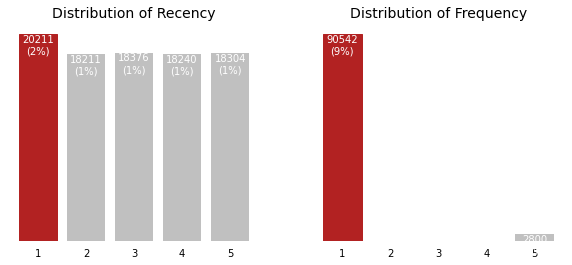

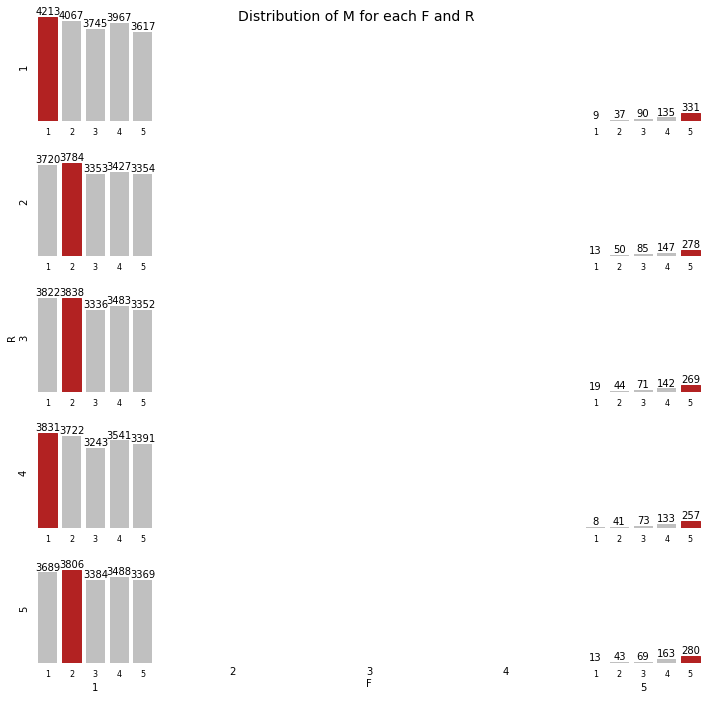

In [74]:
# построим распределение клиентов по R и F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = df_quant_full[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 10 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# построить график распределения M для оценки RF
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = df_quant_full[(df_quant_full['R'] == r) & (df_quant_full['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

In [75]:
# Давайте посмотрим на распределение наших сегментов. 
# Гистограммы лучше подходят для сравнения величин.

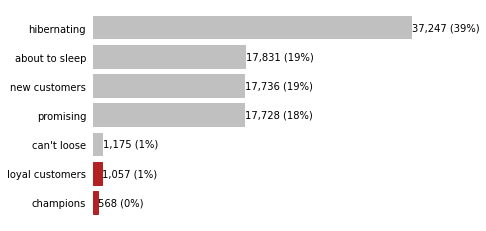

In [76]:
segments_counts = df_quant_full['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

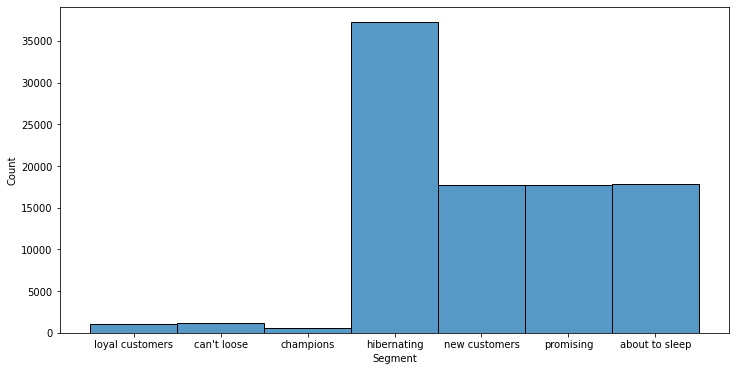

In [77]:
plt.subplots(figsize=(12, 6))
sns.histplot(df_quant_full.Segment)

In [ ]:
# видно, что основные наши клиенты - Hibernating - Последняя покупка была давно и мало заказов.